In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
DATASET1 = '/content/X.txt'
LOOPS = 10
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8

In [0]:
def dataset_to_list_points(dir_dataset):
    """
    Lea un archivo txt con un conjunto de puntos y devuelva una lista de objetos Punto
    :conjunto de datos param dir:
    """
    
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::")))))
    return points

In [0]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()

In [0]:
def select_clusters(dataset, loops, max_iterations, init_cluster, tolerance,
                    num_threads):
    # Leer conjunto de datos
    points = dataset_to_list_points(dataset)

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=num_threads)

        # Calcular Kmeans
        kmeans.fit(points)

        # Obtener inercia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

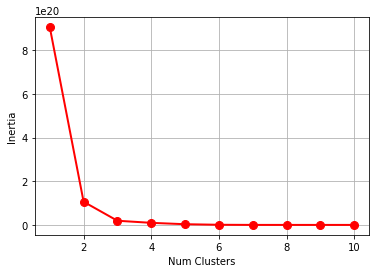

In [43]:
if __name__ == '__main__':
    select_clusters(DATASET1, LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,
                    CONVERGENCE_TOLERANCE, NUM_THREADS)